

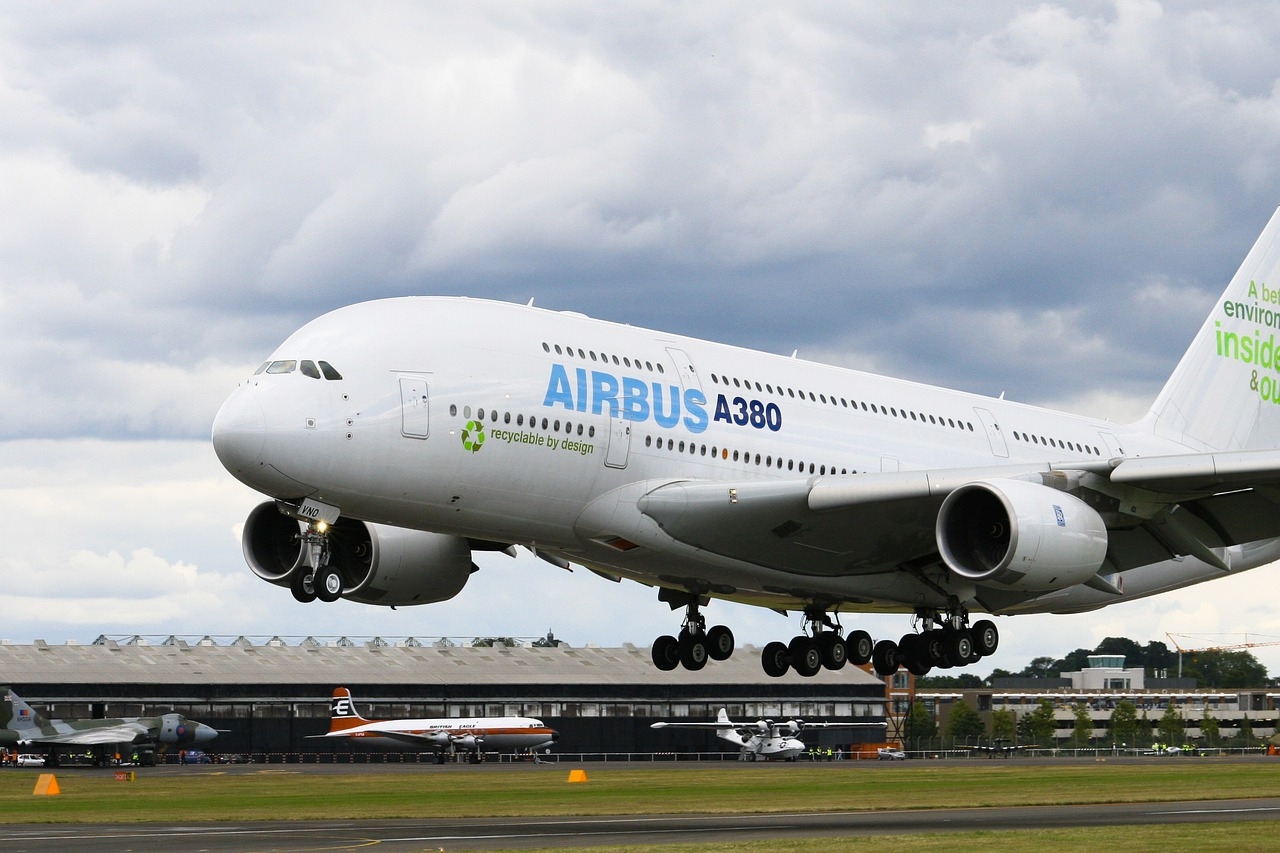

# Commercial and Private Airplane Maker Recommendations

Purchasing airplanes from makers with low percentage of accidents resulting in fatalities and low percentage of totally destroyed aircraft will save money.

# Overview

This project aims to provide your company leadership with the best commercial and private airplane investment recommendations based on the risk of airplane destruction or fatality in an accident. The purchase price of airplanes can be exorbitant, but the costs of replacement and even more so, fatalities, can be astronomical.

# Business Understanding

Your company is diversifying its portfolio to include airplanes, but needs to conduct analysis considering the risk to determine the best planes to purchase.

# Data Understanding and Analysis

Data is sourced from the National Transportation Safety Board (NTSB) Aviation Investigations Accident/Incident database. "The NTSB aviation accident database contains civil aviation accidents and selected incidents that occurred from 1962 to present within the United States, its territories and possessions, and in international waters. Foreign investigations in which the NTSB participated as an accredited representative will also be listed."

In [1]:
#Bring in packages for analysis.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the Avaiation Data set 
df = pd.read_csv("data/AviationData.csv", encoding='ISO-8859-1', low_memory=False)

### Initial review of the data


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
df.isna().sum()/len(df)*100

# Looking at the percentage of null/na rows in each column

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

# Data cleaning and manipulation: creation of new columns, filtering, and dropping of columns and rows

Below we are creating a new column to only look at the year of the accident to make it easier to filter, and then filtered our data to only show us records from 2000-2023. This limited our data from 88,889 down to 41,214. We decided that we wanted to focus on the number of fatalities due to accidents and destroyed airplanes in the data set and only looking at domestic flights as well. We dropped any columns that didnt deem necessary, while also dropping any rows that were missing either the Make or the Model of the airplane as well. 

Once all unnecessary columns and rows were dropped, the final data set consisted of 18,017 rows. 

In [8]:
df['Event.Year'] = pd.DatetimeIndex(df['Event.Date']).year

In [9]:
df = df[df['Event.Year'] >= 2000]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41214 entries, 47675 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                41214 non-null  object 
 1   Investigation.Type      41214 non-null  object 
 2   Accident.Number         41214 non-null  object 
 3   Event.Date              41214 non-null  object 
 4   Location                41198 non-null  object 
 5   Country                 41198 non-null  object 
 6   Latitude                34359 non-null  object 
 7   Longitude               34350 non-null  object 
 8   Airport.Code            25048 non-null  object 
 9   Airport.Name            25387 non-null  object 
 10  Injury.Severity         40214 non-null  object 
 11  Aircraft.damage         39146 non-null  object 
 12  Aircraft.Category       28406 non-null  object 
 13  Registration.Number     40161 non-null  object 
 14  Make                    41159 non-

In [11]:
# Here we are dropping any columns that are not needed

df = df.drop(columns=['Latitude', 'Longitude', 'Report.Status', 'Airport.Code', 
                'Airport.Name', 'Registration.Number', 'Number.of.Engines', 'Engine.Type',
                'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight',
                'Report.Status', 'Publication.Date', 'Location']) 

In [12]:
# Removing any aircrafts that were amateur built
df.drop(df.index[df["Amateur.Built"] == "Yes"], inplace=True) 

# Removing any countries outside of the United States because we only want to look at domestic flights
df.drop(df.index[df["Country"] != "United States"], inplace=True)

# Removing any aircrafts that are not categorized under airplane
df.drop(df.index[df["Aircraft.Category"] != "Airplane"], inplace=True)

# Removing any aircrafts that are missing either the make or the model
df.drop(df.index[df['Make'].isna()], inplace = True)
df.drop(df.index[df['Model'].isna()], inplace =True)

## Manual cleaning

In the following cells, we looked at the Make and Model columns and came to the conclusion that we needed to normalize the data, there were multiple spellings of the same company, some were uppercased, some lowercased, some included the company suffix at the end as well. We had to do some manual data cleaning to replace these as you can see below. 
Once we normalized the data, we could create a combined make and model columns of the airplanes. 

In [13]:
df['Make'].value_counts()

CESSNA               4264
PIPER                2494
Cessna               2095
Piper                1089
BEECH                 890
                     ... 
NOORDUYN                1
Spartan                 1
COLYAER SL              1
Schweizer, N36289       1
PIPISTREL D O O         1
Name: Make, Length: 1185, dtype: int64

In [14]:
df['Make'] = df['Make'].astype(str)
df['Make'] = df['Make'].str.capitalize()

In [15]:
df['Model'] = df['Model'].astype(str)
df['Model'] = df['Model'].str.upper()

In [16]:
df["Make"] = df["Make"].replace ("Air tractor inc", "Air tractor")
df["Make"] = df["Make"].replace ("Air tractor inc.", "Air tractor")
df["Make"] = df["Make"].replace ("Airbus industrie", "Airbus")
df["Make"] = df["Make"].replace ("American aviation", "American")
df["Make"] = df["Make"].replace ("American aviation corp. (aac)", "American")
df["Make"] = df["Make"].replace ("American champion (acac)", "American champion")
df["Make"] = df["Make"].replace ("American champion aircraft)", "American champion")
df["Make"] = df["Make"].replace ("American legend aircraft co", "American legend")
df["Make"] = df["Make"].replace ("Aviat aircraft inc", "Aviat")
df["Make"] = df["Make"].replace ("Aviat inc", "Aviat")
df["Make"] = df["Make"].replace ("Ayres corporation", "Ayres")
df["Make"] = df["Make"].replace ("Boeing stearman", "Boeing")
df["Make"] = df["Make"].replace ("Boeing company", "Boeing")
df["Make"] = df["Make"].replace ("The boeing company", "Boeing")
df["Make"] = df["Make"].replace ("Bombardier, inc.", "Bombardier")
df["Make"] = df["Make"].replace ("Bombardier inc", "Bombardier")
df["Make"] = df["Make"].replace ("Britten-norman", "Britten norman")
df["Make"] = df["Make"].replace ("Cessna aircraft", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft co", "Cessna")
df["Make"] = df["Make"].replace ("Cessna aircraft company", "Cessna")
df["Make"] = df["Make"].replace ("Christen industries inc", "Christen industries")
df["Make"] = df["Make"].replace ("Cirrus design corp.", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corp", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design", "Cirrus")
df["Make"] = df["Make"].replace ("Cirrus design corporation", "Cirrus")
df["Make"] = df["Make"].replace ("Cub crafters", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cub crafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Cubcrafters inc", "Cubcrafters")
df["Make"] = df["Make"].replace ("Dassault-breguet", "Dassault")
df["Make"] = df["Make"].replace ("De havilland", "Dehavilland")
df["Make"] = df["Make"].replace ("Diamond aircraft ind gmbh", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft ind inc", "Diamond")
df["Make"] = df["Make"].replace ("Diamond aircraft industries", "Diamond")
df["Make"] = df["Make"].replace ("Embraer-empresa brasileira de", "Embraer")
df["Make"] = df["Make"].replace ("Embraer s a", "Embraer")
df["Make"] = df["Make"].replace ("Ercoupe (eng & research corp.)", "Ercoupe")
df["Make"] = df["Make"].replace ("Flight design gmbh", "Flight design")
df["Make"] = df["Make"].replace ("Gates learjet corp.", "Gates lear jet")
df["Make"] = df["Make"].replace ("Grumman american", "Grumman")
df["Make"] = df["Make"].replace ("Grumman acft eng cor-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Grumman american avn. corp.", "Grumman")
df["Make"] = df["Make"].replace ("Grumman-schweizer", "Grumman")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer a/c corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream-schweizer", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream american corp", "Gulfstream")
df["Make"] = df["Make"].replace ("Gulfstream aerospace", "Gulfstream")
df["Make"] = df["Make"].replace ("Hawker beechcraft", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corp.", "Hawker")
df["Make"] = df["Make"].replace ("Hawker beechcraft corporation", "Hawker")
df["Make"] = df["Make"].replace ("Hawker siddeley", "Hawker")
df["Make"] = df["Make"].replace ("Jabiru usa sport aircraft llc", "Jabiru")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Learjet inc", "Learjet")
df["Make"] = df["Make"].replace ("Liberty aerospace incorporated", "Liberty aerospace inc.")
df["Make"] = df["Make"].replace ("Mcdonnell douglas aircraft co", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Douglas", "Mcdonnell douglas")
df["Make"] = df["Make"].replace ("Lancair company", "Lancair")
df["Make"] = df["Make"].replace ("Mooney aircraft corp.", "Mooney")
df["Make"] = df["Make"].replace ("Mooney airplane co inc", "Mooney")
df["Make"] = df["Make"].replace ("Nanchang china", "Nanchang")
df["Make"] = df["Make"].replace ("Pilatus aircraft ltd", "Pilatus")
df["Make"] = df["Make"].replace ("Piper aircraft inc", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft corporation", "Piper")
df["Make"] = df["Make"].replace ("Piper aircraft", "Piper")
df["Make"] = df["Make"].replace ("Piper/cub crafters", "Piper")
df["Make"] = df["Make"].replace ("Quest aircraft company llc", "Quest")
df["Make"] = df["Make"].replace ("Raytheon aircraft company", "Raytheon")
df["Make"] = df["Make"].replace ("Raytheon corporate jets", "Raytheon")
df["Make"] = df["Make"].replace ("Remos acft gmbh flugzeugbau", "Remos aircraft gmbh")
df["Make"] = df["Make"].replace ("Rockwell international", "Rockwell")
df["Make"] = df["Make"].replace ("Ryan aeronautical", "Ryan")
df["Make"] = df["Make"].replace ("Schweizer aircraft corp", "Schweizer")
df["Make"] = df["Make"].replace ("Stearman aircraft", "Stearman")
df["Make"] = df["Make"].replace ("Taylorcraft aviation corp", "Taylorcraft")
df["Make"] = df["Make"].replace ("Thrush aircraft inc", "Thrush")
df["Make"] = df["Make"].replace ("Vans aircraft inc", "Vans")
df["Make"] = df["Make"].replace ("Waco classic aircraft", "Waco")
df["Make"] = df["Make"].replace ("Weatherly aviation co inc", "Weatherly")

In [17]:
df['Make'].value_counts()

Cessna                 6384
Piper                  3614
Beech                  1253
Boeing                  408
Air tractor             395
                       ... 
Cessna aircraft co.       1
Sport flight              1
Smith aerostar            1
Fetterman lanny r         1
Fokker                    1
Name: Make, Length: 898, dtype: int64

In [18]:
#Creation of a combined make and model column
df['Make.Model'] = df['Make']+ ' ' + df['Model']

In [19]:
# Reviewing the top 50 makes and models
df['Make.Model'].value_counts()

Cessna 172                                 672
Cessna 152                                 290
Cessna 172S                                272
Cessna 182                                 244
Cessna 172N                                237
                                          ... 
Waco classic aircraft corp. YMF 5C           1
Commander AC-680                             1
Ultralight america SPITFIRE II MODELCTV      1
Bellanca 7ACA                                1
North wing uum inc SPORT X2 912              1
Name: Make.Model, Length: 3351, dtype: int64

## Fatal accidents and Commercial airplane columns

Next, we made two more columns. The first column is creating a column that states whether the airplane is commercial, the parameters being that its Make is either Boeing or Airbus. The second column that was created was whether or not the accdient resulted in one or more fatalities. Because larger planes could have more fatalities than the smaller planes, we felt it didn't matter as much to the quantity of fatalities in the accident vs if there was at least one. 

In [20]:
df['Total.Fatal.Injuries'].value_counts()

0.0     12948
1.0      1366
2.0       759
3.0       226
4.0       133
5.0        44
6.0        20
7.0         8
10.0        5
9.0         3
8.0         3
11.0        1
14.0        1
49.0        1
13.0        1
65.0        1
Name: Total.Fatal.Injuries, dtype: int64

In [21]:
# This creates a new column with "yes" for if the make is boeing or airbus and "no" for everything else.
df["Commercial"] = "No"
df.loc[df["Make"].isin(["Boeing", "Airbus"]), "Commercial"] = "Yes"

In [22]:
# This creates a new column with "0" for no fatalities and "1" if one or more fatalities
df["Fatal"] = np.where((df["Total.Fatal.Injuries"].isna()) | (df["Total.Fatal.Injuries"] == 0), 0, 1)

In [23]:
df['Fatal'].value_counts()

0    15445
1     2572
Name: Fatal, dtype: int64

In [24]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event.Year,Make.Model,Commercial,Fatal
47864,20001212X20487,Accident,FTW00FA083B,2000-02-16,United States,Fatal(1),Substantial,Airplane,Cessna,208B,...,Unknown,1.0,NaN,NaN,1.0,VMC,2000,Cessna 208B,No,1
47869,20001212X20487,Accident,FTW00FA083A,2000-02-16,United States,Fatal(1),Destroyed,Airplane,Cessna,182M,...,Personal,1.0,NaN,NaN,1.0,VMC,2000,Cessna 182M,No,1
47870,20001212X20472,Accident,DCA00MA026,2000-02-16,United States,Fatal(3),Destroyed,Airplane,Mcdonnell douglas,DC-8-71F,...,NaN,3.0,NaN,NaN,NaN,VMC,2000,Mcdonnell douglas DC-8-71F,No,1
47942,20001212X20606,Accident,DCA00MA030,2000-03-05,United States,Non-Fatal,Destroyed,Airplane,Boeing,737-300,...,Unknown,NaN,2.0,42.0,98.0,VMC,2000,Boeing 737-300,Yes,0
48128,20001212X20873,Accident,MIA00FA129,2000-04-05,United States,Fatal(3),Destroyed,Airplane,Learjet,35A,...,Instructional,3.0,NaN,NaN,NaN,VMC,2000,Learjet 35A,No,1


In [25]:
df['Make'].value_counts()[:20]

Cessna            6384
Piper             3614
Beech             1253
Boeing             408
Air tractor        395
Mooney             379
Cirrus             330
Grumman            276
Bellanca           216
Maule              207
Aeronca            199
Aviat              154
Champion           153
Dehavilland        144
Luscombe           140
Diamond            130
Stinson            129
Airbus             109
North american     101
Taylorcraft         96
Name: Make, dtype: int64

# Visuals and Data Comparisons:

In [26]:
df['Commercial'].value_counts()

No     17500
Yes      517
Name: Commercial, dtype: int64

### Top 5 make and models with the most accidents resulting in fatality

In [27]:
#This is grouping our make.model column with the total.fatal.injuries column. 
#It is also declaring a variable to be equal to the make.models with the top 5 most fatalities
MakeModel_fatalities = df.groupby('Make.Model')['Total.Fatal.Injuries'].sum()

top_5_MakeModel_by_fatalities = MakeModel_fatalities.sort_values(ascending=False).head(5)

print(top_5_MakeModel_by_fatalities)

Make.Model
Cirrus SR22         111.0
Cessna 172          103.0
Beech A36            91.0
Boeing 767-200ER     65.0
Cessna 182           63.0
Name: Total.Fatal.Injuries, dtype: float64


In [28]:
#This is declaring variables which will be used for the bar graph axis below after grouping them above. 
make_model_names = top_5_MakeModel_by_fatalities.index
fatal_injuries = top_5_MakeModel_by_fatalities.values

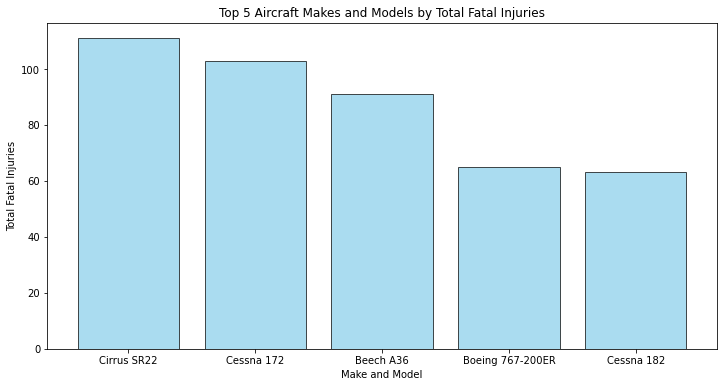

In [29]:
#Bar Chart Showing the Top 5 Make.Models by total Fatalities
plt.figure(figsize=(12, 6))
plt.bar(make_model_names, fatal_injuries, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Top 5 Aircraft Makes and Models by Total Fatal Injuries')
plt.xticks(rotation=0, ha='center');

The bar chart above is showing the top 5 airplanes with the most fatal injuries. As you can see, the Cirrus SR22 has the most fatalities with 111, Cessna 172 with 103, Beech A36 with 91, Boeing 767-200ER with 65 and the Cessna 182 with 63 fatalities. 

###  Fatalities in Commercial Flight Analysis

In [30]:
Commercial_Flights = df[df['Commercial'] == 'Yes']
Totaled_Commercial_Fatalities_by_Make = Commercial_Flights.groupby('Make')['Fatal'].sum()
Totaled_Commercial_Fatalities_by_Make.tail(5)
#This groups the sum of Fatal values equal to 1 based on the Make with a Commercial value of Yes 

Make
Airbus     1
Boeing    14
Name: Fatal, dtype: int64

In [31]:
Boeing_Occurances = 408
Boeing_Fatality_Occurance = 14
Airbus_Occurances = 109
Airbus_Fatality_Occurances = 1

Boeing_Average_Fatality_Occurance = Boeing_Fatality_Occurance/Boeing_Occurances
Airbus_Average_Fatality_Occurance = Airbus_Fatality_Occurances/Airbus_Occurances

print(Boeing_Average_Fatality_Occurance)
print(Airbus_Average_Fatality_Occurance)

0.03431372549019608
0.009174311926605505


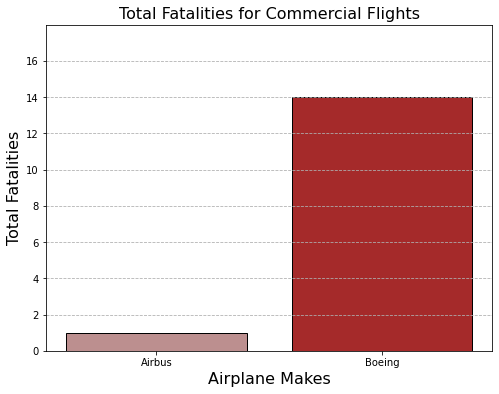

In [32]:
makes = ["Airbus", "Boeing"]
totaled_fatalities_occurence = [1, 14]

plt.figure(figsize=(8, 6))
plt.bar(makes, totaled_fatalities_occurence, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Total Fatalities", fontsize=16)
plt.title("Total Fatalities for Commercial Flights", fontsize=16)
plt.ylim(0, 18)
plt.yticks(range(0, 18, 2))
plt.grid(axis='y', linestyle='--');

The chart above is showing the total number of fatal accidents that Boeing and Airbus had in the data set. What is going to be more important though is comparing the occurances of fatal accidents by the sample size which we are doing in the following visual. 

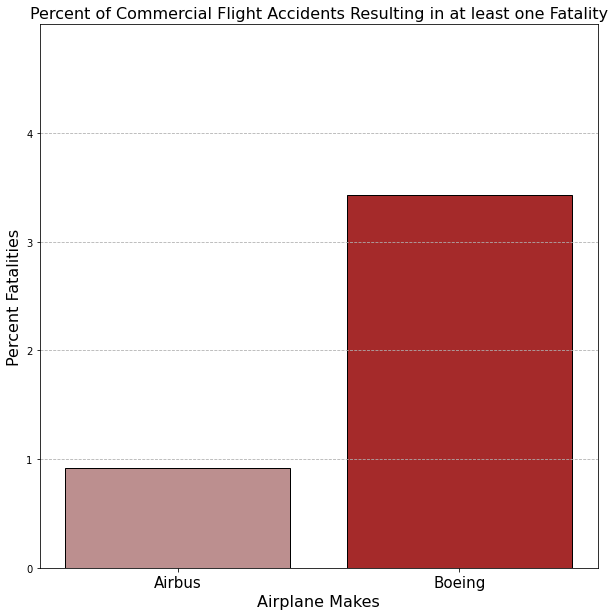

In [33]:
makes = ["Airbus", "Boeing"]
fatalities_occurance_averages = [Airbus_Average_Fatality_Occurance*100, Boeing_Average_Fatality_Occurance*100]

plt.figure(figsize=(10, 10))
plt.bar(makes, fatalities_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Fatalities", fontsize=16)
plt.title("Percent of Commercial Flight Accidents Resulting in at least one Fatality", fontsize=16)
plt.ylim(0, 5)
plt.yticks(range(0, 5, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

The chart above is showing the percent of both Airbus and Boeing flights that resulted in at least 1 fatality. As you can see Airbus is at 0.9% and Boeing is at 3.4%.
Therefore we can recommend Airbus as the Safest Commercial Maker adjusted for the limitations in the dataset.

### Private Flight Damage Analysis

In [34]:
Private_Flights_Minor_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Minor')]
Private_Flights_Minor_Damage_MostCommon = Private_Flights_Minor_Damage['Make'].value_counts().nlargest(20)
#This is giving us the top 20 most commonly occuring Makes by Minor Damage so we can get the average. 

In [35]:
Private_Flights_Minor_Damage_MostCommon
#As we can see below Cessna has 59 occurences, Piper has 27 occurences, Bombardier has 21 occurences

Cessna               59
Piper                27
Bombardier           21
Beech                18
Embraer              16
Mcdonnell douglas    14
Cirrus               11
Raytheon              8
Dehavilland           6
Diamond               4
North american        4
Hawker                3
Flight design         3
Mooney                3
Taylorcraft           3
Gulfstream            3
Air tractor           3
Aviat                 3
Mitsubishi            2
Atr                   2
Name: Make, dtype: int64

In [36]:
#Cessna occurs 6384
#Piper occurs 3614
#Bombardier occurs 94
#We can find average occurance of minor damages by accidents
Cessna = (59/6384) * 100
Piper = (27/3614) * 100
Bombardier = (21/94) * 100


print(Cessna)
print(Piper)
print(Bombardier)

0.9241854636591478
0.7470946319867183
22.340425531914892


In [37]:
Private_Flights_Destroyed_Damage = df[(df['Commercial'] == 'No') & (df['Aircraft.damage'] == 'Destroyed')]
Private_Flights_Destroyed_MostCommon = Private_Flights_Destroyed_Damage['Make'].value_counts().nlargest(40)

In [38]:
df["Aircraft.damage"].value_counts()

Substantial    15770
Destroyed       1418
Minor            362
Unknown           40
Name: Aircraft.damage, dtype: int64

In [39]:
Private_Flights_Destroyed_MostCommon

Cessna                        401
Piper                         297
Beech                         169
Cirrus                         53
Air tractor                    44
Mooney                         37
Grumman                        34
North american                 15
Raytheon                       14
Rockwell                       11
Hawker                         11
Dehavilland                    11
Champion                       10
Bellanca                       10
Socata                          9
Aviat                           9
Ayres                           8
Aeronca                         7
Maule                           7
Mitsubishi                      7
Smith                           6
Diamond                         6
Flight design                   6
Gulfstream                      6
Aero commander                  6
Learjet                         5
American                        5
Pilatus                         5
Aero vodochody                  4
Columbia aircr

In [40]:
# Here we are looking at the number of destroyed Bombardier airplanes in the data set
Bombardier_Destroyed = df[(df['Make'] == 'Bombardier') & (df['Aircraft.damage'] == 'Destroyed') & (df['Commercial'] == 'No')]
Total_Bomb_Destroyed = len(Bombardier_Destroyed)
Total_Bomb_Destroyed

2

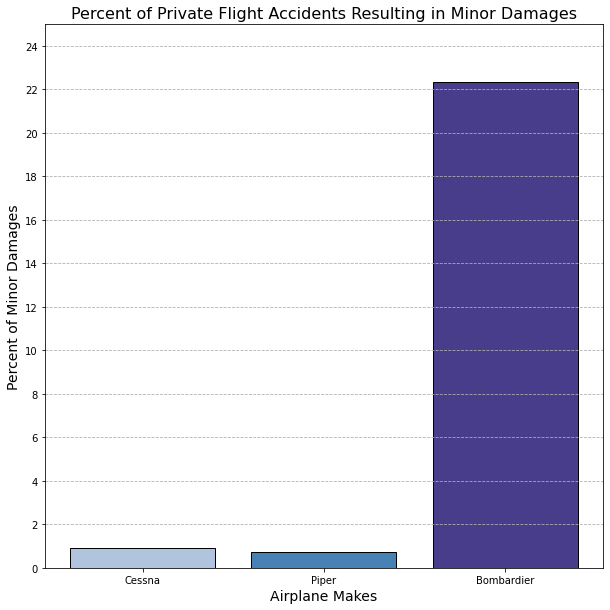

In [41]:
makes = ["Cessna", "Piper", "Bombardier"]
minor_dmg_occurence_averages = [Cessna, Piper, Bombardier]

plt.figure(figsize=(10, 10))
plt.bar(makes, minor_dmg_occurence_averages, color=["lightsteelblue", "steelblue", "darkslateblue"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Percent of Minor Damages", fontsize=14)
plt.title("Percent of Private Flight Accidents Resulting in Minor Damages",fontsize=16)
plt.ylim(0, 25)
plt.yticks(range(0, 25, 2))
plt.grid(axis='y', linestyle='--');

The chart above is showing the percentage of private flights resulting in minor damages. We can see that Bombardier has the highest percentage sitting at about 22.3%.  

In [42]:
#now I need to calculate the averages of Destroyed data occurence
Cessna_Destroyed = (401/6384)*100
Piper_Destroyed = (297/3614)*100
Bombardier_Destroyed = (2/94)*100

print(Cessna_Destroyed)
print(Piper_Destroyed)
print(Bombardier_Destroyed)

#I notice that Cessna has the lowest average for destroyed damage types and the second highest 

6.281328320802006
8.2180409518539
2.127659574468085


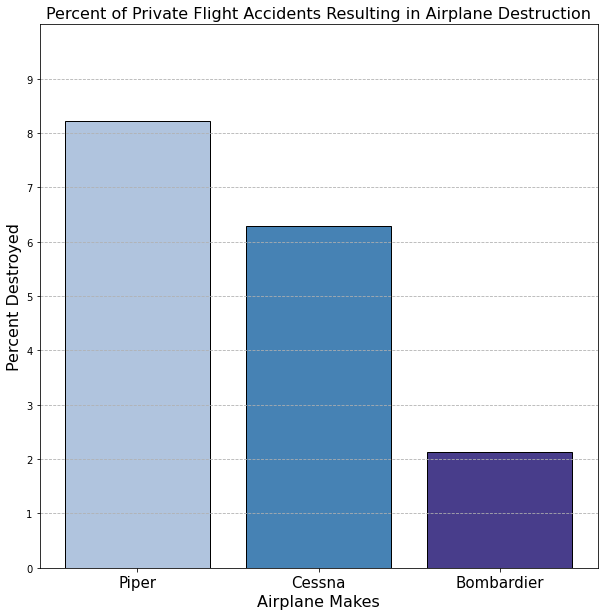

In [43]:
makes = ["Piper", "Cessna", "Bombardier"]
destroyed_dmg_occurence_averages = [Piper_Destroyed, Cessna_Destroyed, Bombardier_Destroyed]

plt.figure(figsize=(10, 10))
plt.bar(makes, destroyed_dmg_occurence_averages, color=["lightsteelblue", "steelblue", "darkslateblue"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Destroyed", fontsize=16)
plt.title("Percent of Private Flight Accidents Resulting in Airplane Destruction", fontsize=16)
plt.ylim(0, 10)
plt.yticks(range(0, 10, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

The chart above is showing the percentage of private flight accidents resulting in the destruction of the airplane. As you can see if you compare the previous chart with this one, Bombardier has the lowest percentage of destruction whereas Piper has the highest percentage of flights resulting in destruction. 

### Commercial Flight Damage Analysis

In [44]:
# Comparing the Average of Minor Damage and Destroyed Airplanes for Commercial Flights
Commercial_Flights_Minor_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Minor')]
Commercial_Flights_Minor_Damage_Totaled = Commercial_Flights_Minor_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Minor_Damage_Totaled

Boeing    69
Airbus    33
Name: Make, dtype: int64

In [45]:
#Boeing has 1215 occurences in the filtered data set and 69 of those had minor damages
#Airbus has 244 occurences in the filtered data set and 33 of those had minor damages
#Lets find the averages
Boeing_Minor = (69/1215)*100
Airbus_Minor = (33/244)*100

print(Boeing_Minor)
print(Airbus_Minor)

5.679012345679013
13.524590163934427


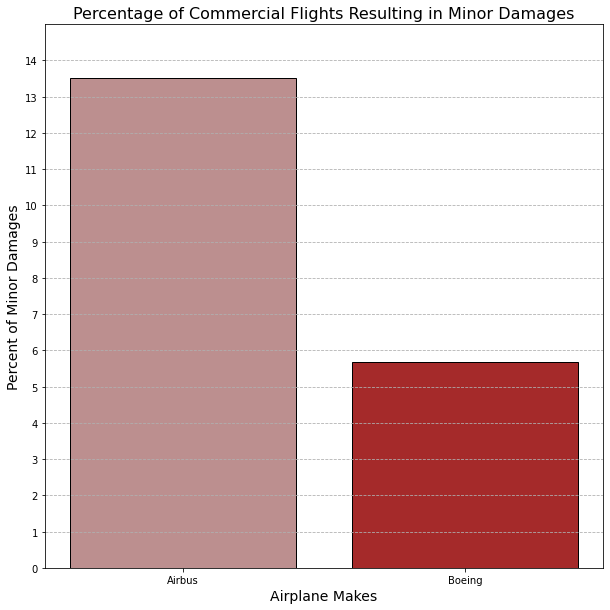

In [46]:
makes = ["Airbus", "Boeing"]
Commercial_MinorDmg_occurance_averages = [Airbus_Minor, Boeing_Minor]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_MinorDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Percent of Minor Damages", fontsize=14)
plt.title("Percentage of Commercial Flights Resulting in Minor Damages", fontsize=16)
plt.ylim(0, 15)
plt.yticks(range(0, 15, 1))
plt.grid(axis='y', linestyle='--');

The chart above is showing the percentage of commercial flights that resulted in minor damanges due to an accident. Airbus has a higher percentage of flights with minor damage.

In [47]:
Commercial_Flights_Destroyed_Damage = df[(df['Commercial'] == 'Yes') & (df['Aircraft.damage'] == 'Destroyed')]
Commercial_Flights_Destroyed_Damage_Totaled = Commercial_Flights_Destroyed_Damage['Make'].value_counts().nlargest()
Commercial_Flights_Destroyed_Damage_Totaled

Boeing    10
Airbus     1
Name: Make, dtype: int64

In [48]:
Boeing_Destroyed = (10/1215) *100
Airbus_Destroyed = (1/244) *100

print(Boeing_Destroyed)


0.823045267489712


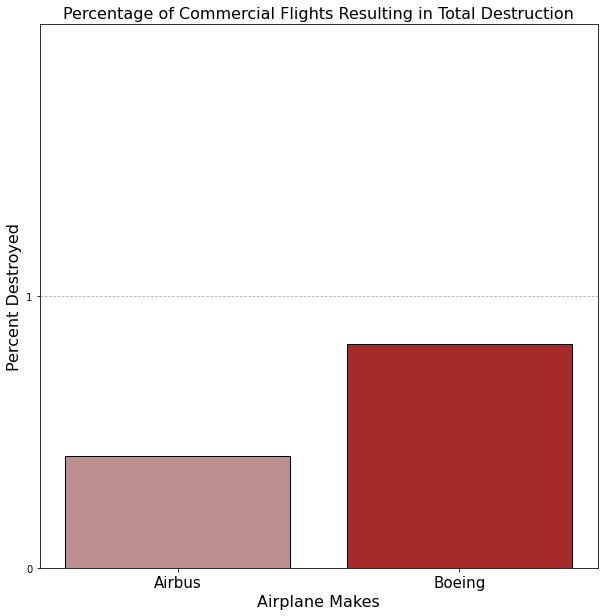

In [49]:
makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [Airbus_Destroyed, Boeing_Destroyed]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=16)
plt.ylabel("Percent Destroyed", fontsize=16)
plt.title("Percentage of Commercial Flights Resulting in Total Destruction", fontsize=16)
plt.ylim(0, 2)
plt.yticks(range(0, 2, 1))
plt.tick_params(axis='x', labelsize=15)
plt.grid(axis='y', linestyle='--');

The chart above is showing the percentage of commercial flights that resulted in destruction due to an accident. Boeing has a higher percentage of flights where the planes were destroyed.

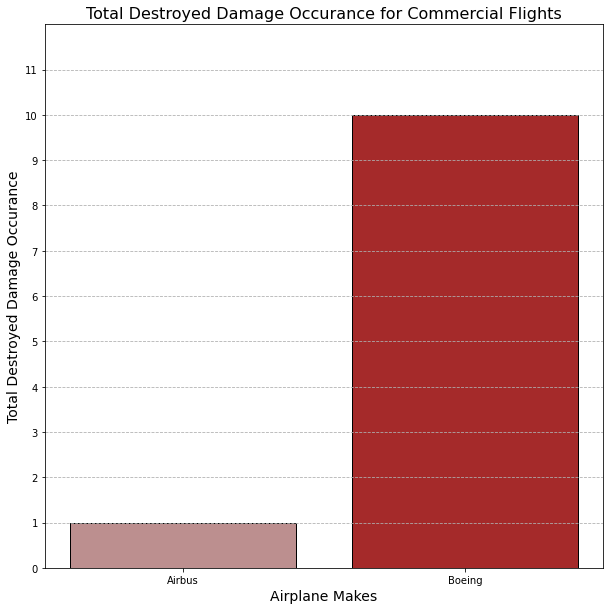

In [50]:
makes = ["Airbus", "Boeing"]
Commercial_DestroyedDmg_occurance_averages = [1, 10]
plt.figure(figsize=(10, 10))
plt.bar(makes, Commercial_DestroyedDmg_occurance_averages, color=["rosybrown", "brown"], edgecolor='black')
plt.xlabel("Airplane Makes", fontsize=14)
plt.ylabel("Total Destroyed Damage Occurance", fontsize=14)
plt.title("Total Destroyed Damage Occurance for Commercial Flights", fontsize=16)
plt.ylim(0, 12)
plt.yticks(range(0, 12, 1))
plt.grid(axis='y', linestyle='--');

The chart above is showing the total number of commercial flights that were destroyed due to an accident. Airbus only had 1 destroyed plane in the data set whereas Boeing had 10. 

In [51]:
df.to_csv("data/Aviation_FinalData.csv", encoding='ISO-8859-1', index=False)

# Description of data

### Data Shape

The final data set used for this analysis contains 18017 rows and 21 columns. Columns: Event.Year, Make.Model, Fatal, and Commercial were all generated using the original NTSB dataset; the remaining columns came directly unaltered from the original data set.

### Data Manipulation

Data were filterd to exclude: (a) amateur built planes, (b) events occurring outside the United States, (c) aircraft other than airplanes (including null values), (d) any event with missing make or model, and (e) any event prior to the year 2000. The top 200 makes were printed out, reviewed for likeness, and combined as needed, e.g., Boeing company, BOEING, and Boeing were combined into one make.

### Data limitations

There are limitations to this dataset and analysis: (a) this database only contains accident/incident data and does not represent successful flights, (b) this analysis was limited to events with "airplane" listed in Aircraft.Category; with a large number (32%) of null Aircraft Category values many probable airplanes not specifically called out as such were dropped from the dataset. (c) this analysis did not filter out the Purpose.of.flight; some values in this column indicate more risky behavior than others and could have impacted the success of the flight.

### Data statistics and interpretation

1) Airbus accidents in the United States resulted in a fatality for less than 1% of of all accidents.

2) Airbus accidents in the United States resulted in total destruction less than 0.5% of all accidents.

3) Bombardier accidents in the United States resulted in total destruction just over 2% of all accidents.

# Conclusion

Airbus and Bombardier are recommended as the best commercial and private airplane makers, respectively, based on risk of fatality and risk of plane destruction.
